# timeseries_fastai

A fastai2 timeseries repo!

## Getting Started

In [ ]:
from fastai2.basics import *
from fastai2.callback.all import *
from timeseries_fastai.core import *
from timeseries_fastai.data import *
from timeseries_fastai.models.inception import *

In [ ]:
ucr_path = untar_data(URLs.UCR)

In [ ]:
df_train, df_test = load_df_ucr(ucr_path, 'Adiac')

Loading files from: /home/tc256760/.fastai/data/Univariate2018_arff/Adiac


In [ ]:
df = stack_train_valid(df_train, df_test)

In [ ]:
x_cols = df.columns[0:-2].to_list()

In [ ]:
df

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att169,att170,att171,att172,att173,att174,att175,att176,target,valid_col
0,1.598007,1.599439,1.570529,1.550474,1.507371,1.434341,1.368986,1.305294,1.210305,1.116653,...,1.217175,1.312530,1.402920,1.481043,1.521012,1.564154,1.570855,1.592890,b'22',False
1,1.701146,1.670645,1.618884,1.546805,1.475469,1.391209,1.305882,1.237313,1.153414,1.069690,...,1.097360,1.182578,1.266291,1.350571,1.435160,1.519737,1.602518,1.670190,b'28',False
2,1.722342,1.695329,1.656946,1.606312,1.511824,1.414148,1.313688,1.213234,1.112978,1.015081,...,1.164750,1.263924,1.364303,1.463511,1.547307,1.641809,1.694973,1.708488,b'21',False
3,1.726263,1.659836,1.573108,1.496264,1.409070,1.332443,1.245742,1.158882,1.073361,0.987165,...,1.199608,1.275380,1.362258,1.448567,1.535131,1.622158,1.707838,1.739027,b'15',False
4,1.778976,1.761203,1.703084,1.610572,1.492088,1.368654,1.244761,1.120900,1.010762,0.900168,...,1.285657,1.408878,1.507983,1.623643,1.713606,1.766389,1.783633,1.758625,b'2',False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,1.765127,1.750026,1.711097,1.648484,1.576266,1.476857,1.375652,1.287533,1.186471,1.086855,...,1.192923,1.291224,1.391377,1.490076,1.589615,1.661466,1.711183,1.750479,b'25',True
777,1.317664,1.480770,1.477460,1.345680,1.376355,1.383122,1.262999,1.154494,1.057933,0.973615,...,1.038177,0.963510,1.052633,1.149836,1.111965,1.217966,1.214703,1.325830,b'35',True
778,1.652000,1.696799,1.700560,1.675451,1.645406,1.584621,1.568612,1.477382,1.376073,1.345743,...,1.135803,1.190241,1.293052,1.369039,1.435152,1.499251,1.555716,1.620383,b'5',True
779,1.398673,1.293392,1.188837,1.086091,0.984476,0.885808,0.789724,0.696206,0.605575,0.518136,...,1.618150,1.679640,1.713751,1.703014,1.694377,1.636338,1.562648,1.460544,b'36',True


In [ ]:
dls = TSDataLoaders.from_df(df, x_cols=x_cols, label_col='target', valid_col='valid_col')

In [ ]:
inception = create_inception(1, 37)

In [ ]:
learn = Learner(dls, inception, metrics=[accuracy])

In [ ]:
learn.fit_one_cycle(25, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,4.542264,3.617529,0.030691,00:02
1,4.136417,3.625725,0.030691,00:02
2,3.854969,3.637391,0.030691,00:02
3,3.607037,3.640668,0.030691,00:02
4,3.392601,3.579307,0.071611,00:02
5,3.203232,3.328092,0.127877,00:02
6,3.048132,2.932842,0.225064,00:02
7,2.881940,2.600225,0.271100,00:02
8,2.718797,2.178436,0.388747,00:02
9,2.549301,2.019035,0.381074,00:02


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

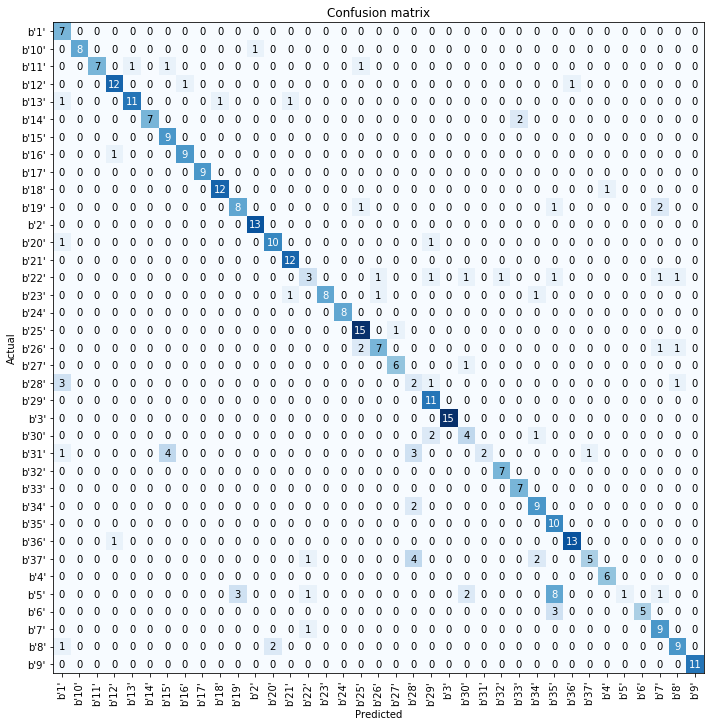

In [ ]:
interp.plot_confusion_matrix(figsize=(10,10))

In [ ]:
# hide
from nbdev.export import *
notebook2script()

Converted 00_core.ipynb.
Converted 01_data.ipynb.
Converted 02_models.inception.ipynb.
Converted 99_index.ipynb.
